# TASK 4

**IMPORTING LIBRARIES:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn

**IMPORTING THE DATASET:**

In [2]:
#dataset
dataset = pd.read_csv("house price prediction.csv")

In [3]:
#To visualize first five rows of dataset
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
#To visualize bottom five rows in dataset
dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
#get whole information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
dataset.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [7]:
dataset['year'] = pd.DatetimeIndex(dataset['date']).year
dataset['month'] = pd.DatetimeIndex(dataset['date']).month

In [8]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5


In [9]:
#get whole information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  year    

In [10]:
#total number of rows and columns in dataset
#there are 4600 rows and 18 columns
dataset.shape

(4600, 20)

In [11]:
#getting the stastics of dataset
dataset.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

In [12]:
#get whole information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  year    

In [13]:
#let's see what data types how many features we are having
dataset.dtypes.value_counts()

int64      11
object      5
float64     4
dtype: int64

In [14]:
#total missing values in dataset
dataset.isnull().values.any()

False

**DATA CLEANING:**

In [15]:
dataset["floors"] = dataset["floors"].replace(0, dataset["floors"].mean())

In [16]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7


In [17]:
dataset["bedrooms"] = dataset["bedrooms"].replace(0, dataset["bedrooms"].mean())

In [18]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7


**CORRELATION:**

In [25]:
#getting correlation
tabcorrelation = dataset.corr()

In [26]:
tabcorrelation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,month
price,1.000000,0.202812,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,NaN,0.041081
bedrooms,0.202812,1.000000,0.543090,0.599751,0.069100,0.182193,-0.003632,0.112960,0.024068,0.490183,0.334090,0.143952,-0.059268,NaN,0.011446
bathrooms,0.327110,0.543090,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,NaN,0.026697
sqft_living,0.430410,0.599751,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,NaN,0.032825
sqft_lot,0.050451,0.069100,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,NaN,-0.023286
floors,0.151461,0.182193,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,NaN,0.036890
waterfront,0.135648,-0.003632,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,NaN,0.007530
view,0.228504,0.112960,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,NaN,-0.011304
condition,0.034915,0.024068,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,NaN,0.017695
sqft_above,0.367570,0.490183,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,NaN,0.042919


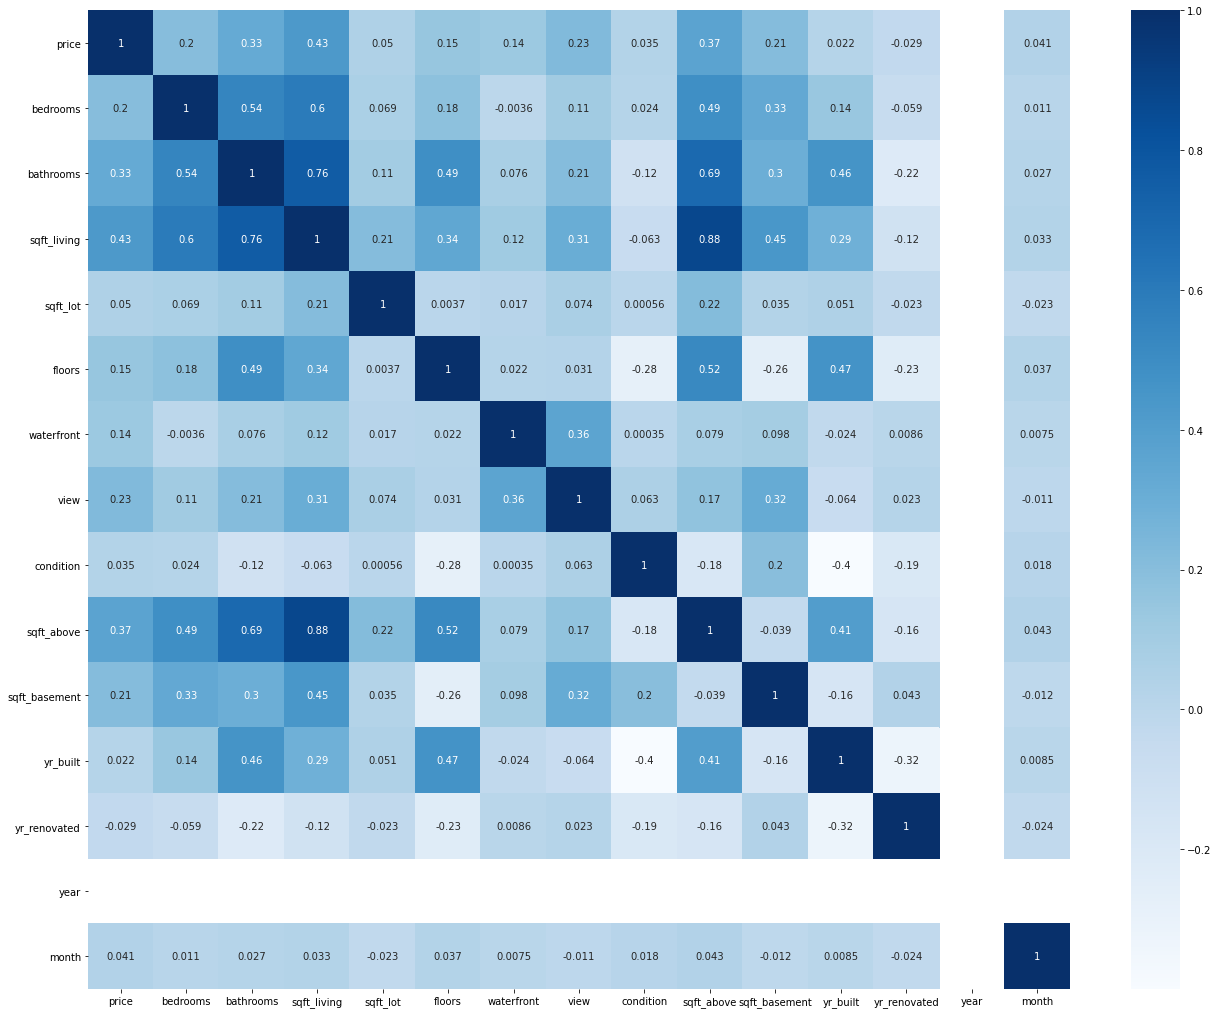

In [27]:
corrmat = dataset.corr()
top_corr = corrmat.index
plt.figure(figsize =(22,18))
p = sns.heatmap(dataset[top_corr].corr(),annot = True,cmap ="Blues")
plt.show()

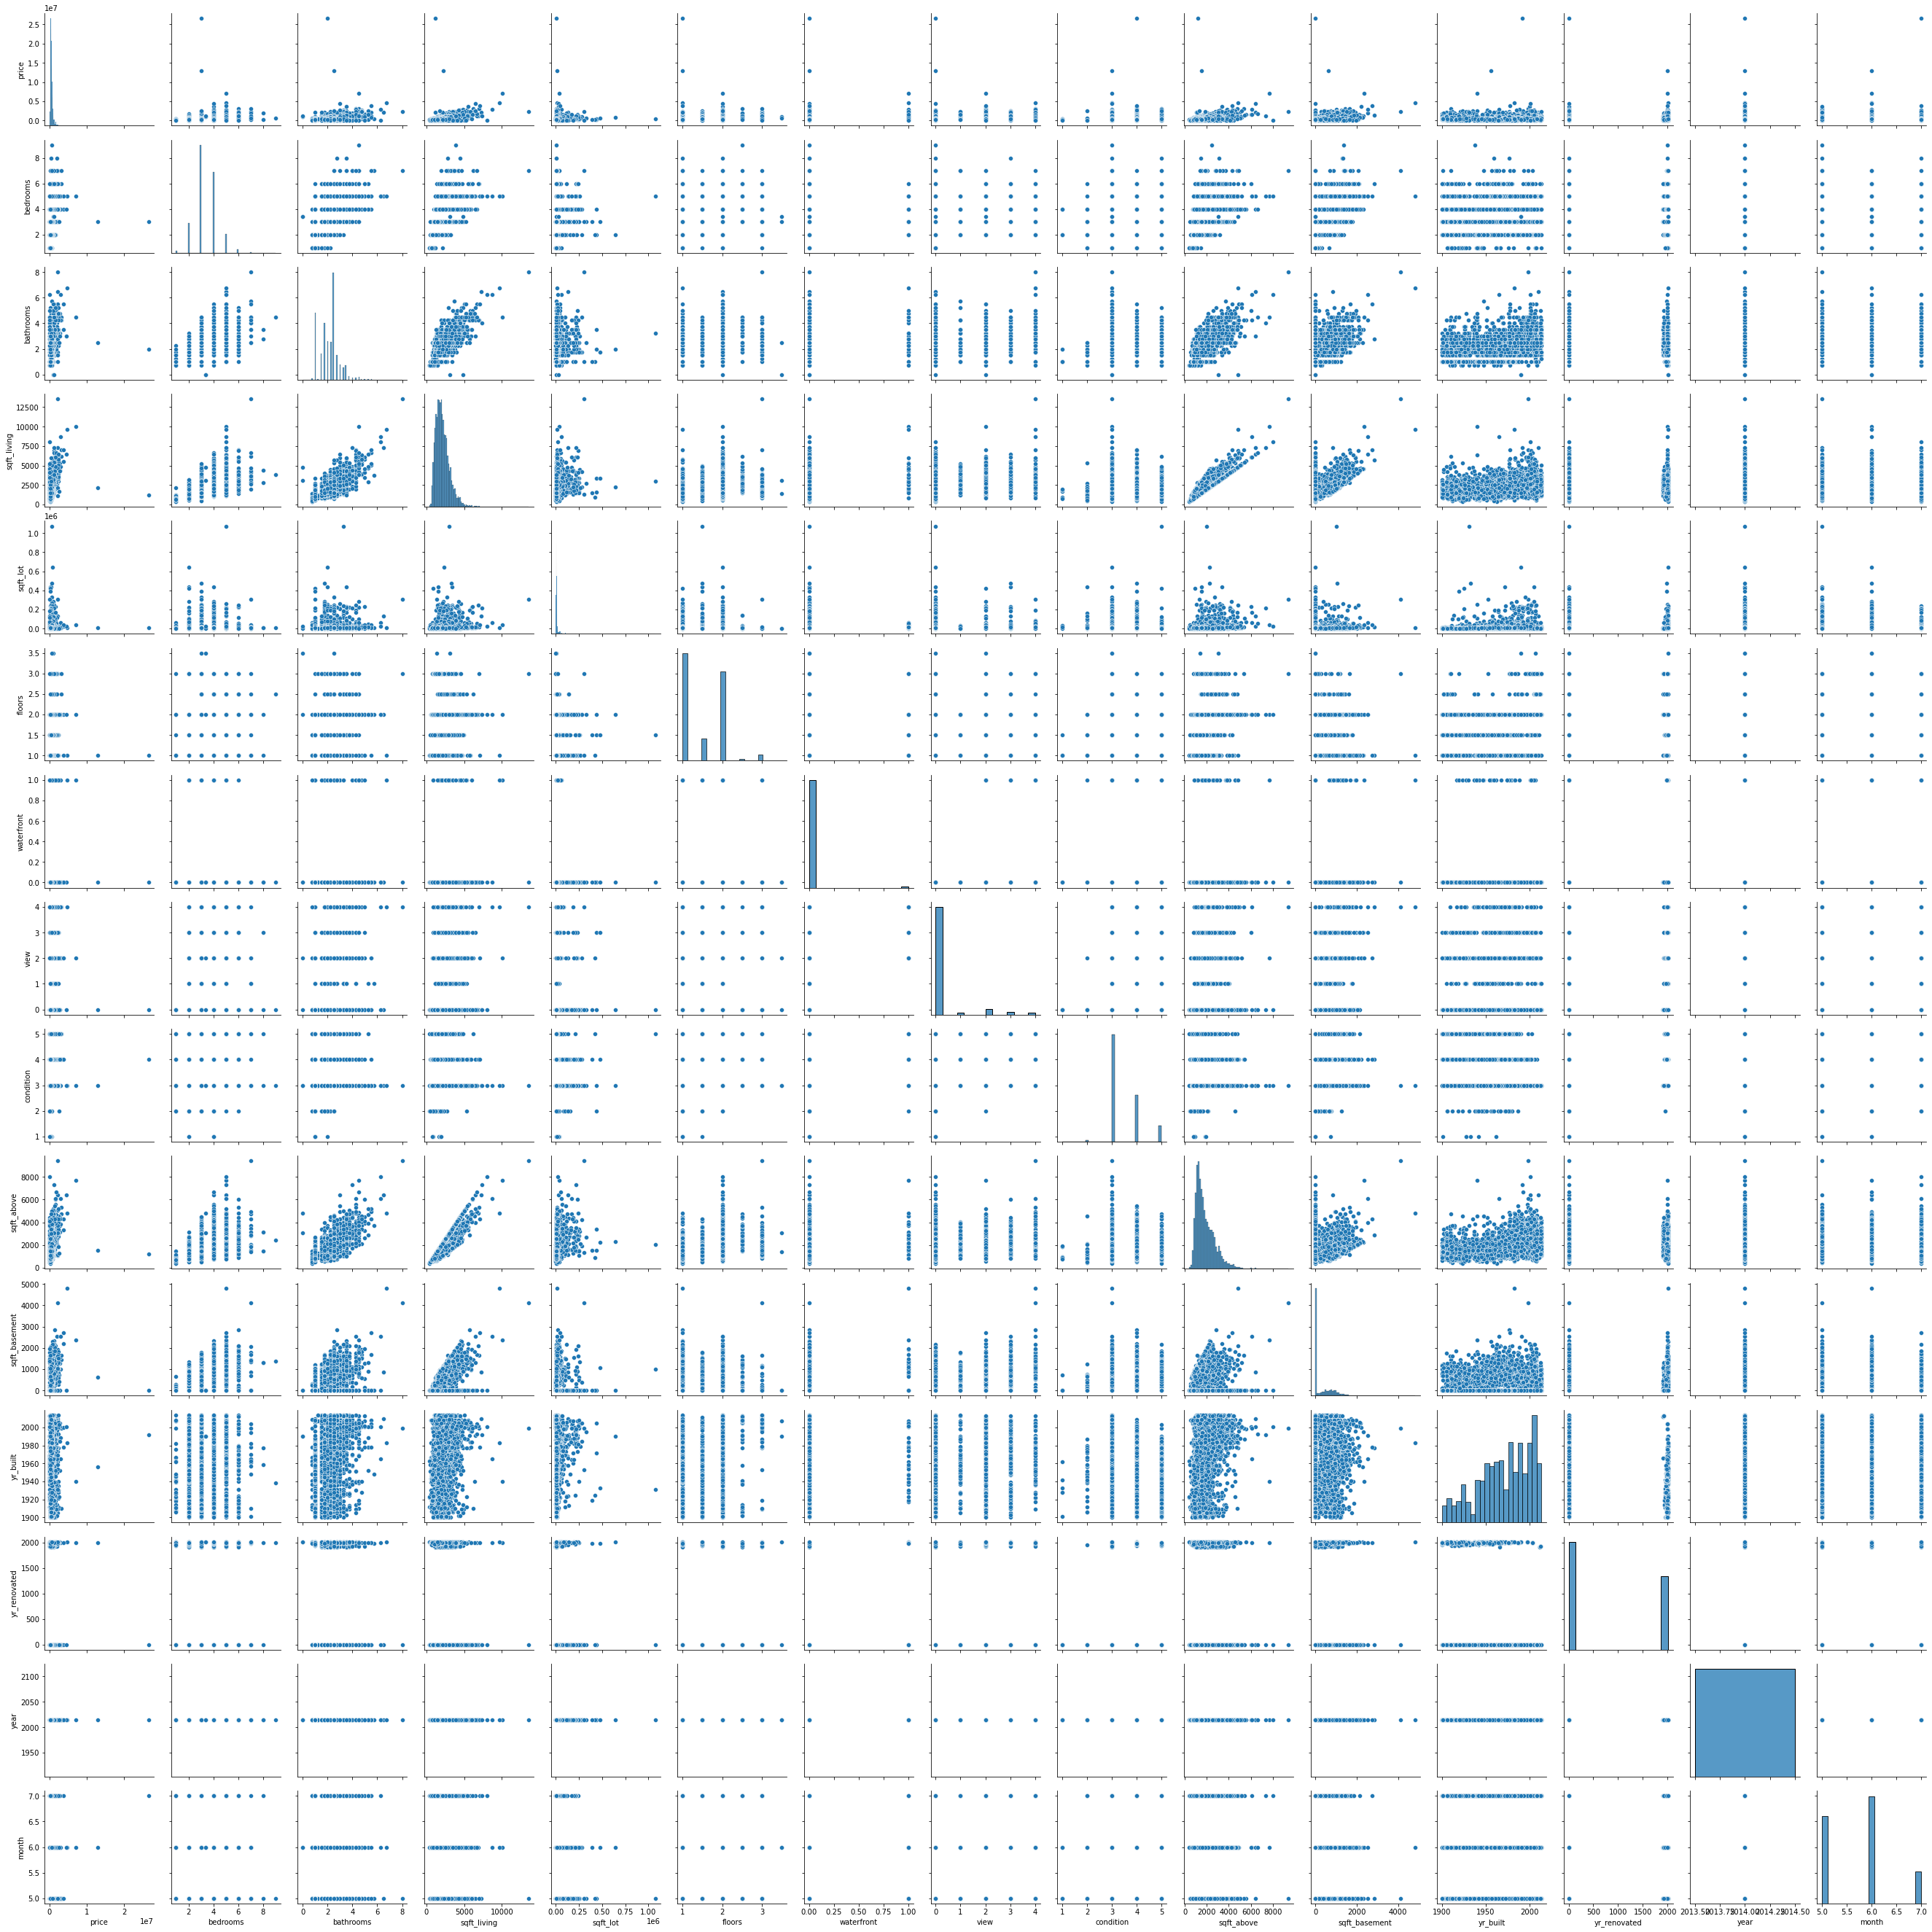

In [28]:
sns.pairplot(dataset)

In [29]:
#check if any null value is present
dataset.isnull().values.any()

False

In [30]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month'],
      dtype='object')

**VISUALIZATION OF DATA:**

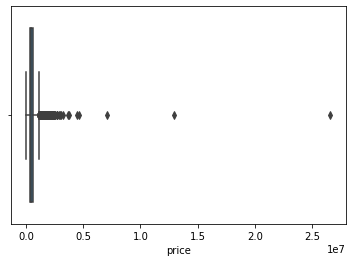

In [32]:
#boxplot of price
sns.boxplot(x='price', data= dataset);


C:\python.c\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

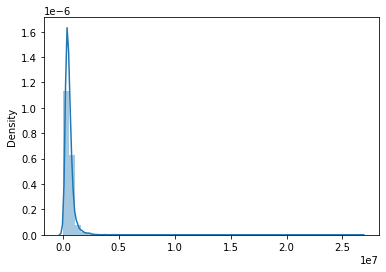

In [33]:
#distplot of price
sns.distplot(x=dataset["price"])

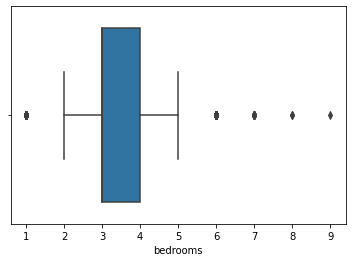

In [36]:
#boxplot of date
sns.boxplot(x='bedrooms', data= dataset);

C:\python.c\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

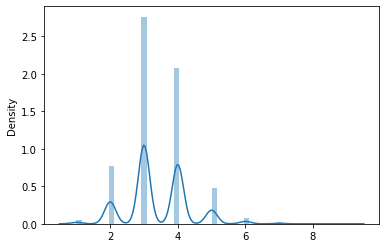

In [35]:
#distplot of price
sns.distplot(x=dataset["bedrooms"])

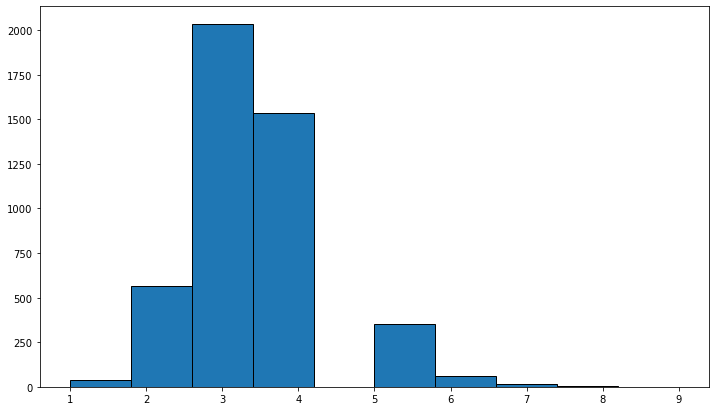

In [37]:
#histplot of bedrooms
plt.figure(figsize =(12,7))
plt.hist("bedrooms",data = dataset,edgecolor ="k")
plt.show()

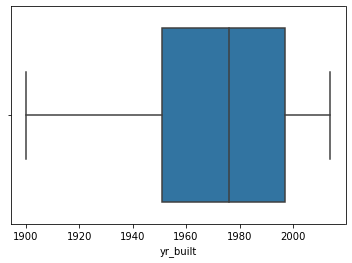

In [38]:
#boxplot of yr_built
sns.boxplot(x='yr_built', data= dataset);

C:\python.c\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

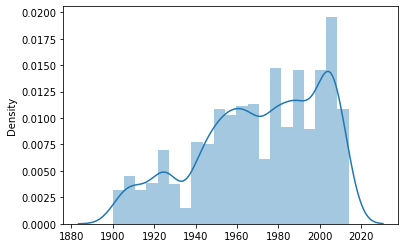

In [39]:
#distplot of yr_built
sns.distplot(x=dataset["yr_built"])

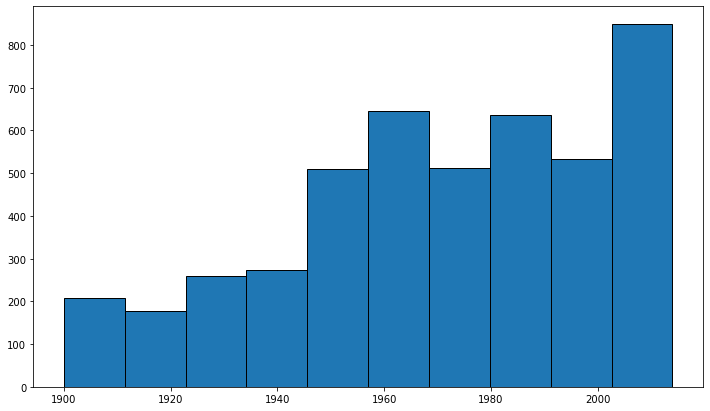

In [40]:
#histplot of yr_built
plt.figure(figsize =(12,7))
plt.hist("yr_built",data = dataset,edgecolor ="k")
plt.show()

C:\python.c\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

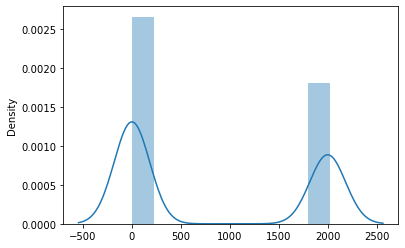

In [41]:
#distplot of yr_built
sns.distplot(x=dataset["yr_renovated"])

**REMOVE OUTLIERS:**

In [42]:
def remove_outliers(dataset, x):
    # Set Limits
    q25, q75 = np.percentile(dataset[x], 25), np.percentile(dataset[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1 ,  (q75 + cut_off)
    dataset = dataset[(dataset[x] < upper) & (dataset[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return dataset

In [43]:
dataset= remove_outliers(dataset, 'price')

Outliers of "price" are removed



In [44]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5


In [45]:
dataset.shape

(4311, 20)

In [47]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,2014,5


**EXPLORING:**

In [111]:
#for date

In [113]:
dataset['price'].unique()

array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
       203400.      , 220600.      ])

In [115]:
dataset.groupby("price")["price"].count()

price
7800.0       1
80000.0      1
83000.0      1
83300.0      2
84350.0      1
            ..
1135250.0    1
1140000.0    2
1145000.0    1
1149000.0    1
1150000.0    8
Name: price, Length: 1568, dtype: int64

In [ ]:
#for bedrooms

In [117]:
dataset['bedrooms'].unique()

array([3.        , 4.        , 2.        , 5.        , 6.        ,
       9.        , 1.        , 7.        , 3.40086957, 8.        ])

In [118]:
dataset.groupby("bedrooms")["bedrooms"].count()

bedrooms
1.00000      37
2.00000     557
3.00000    1981
3.40087       1
4.00000    1394
5.00000     282
6.00000      47
7.00000      10
8.00000       1
9.00000       1
Name: bedrooms, dtype: int64

In [ ]:
#for bathrooms

In [119]:
dataset['bathrooms'].unique()

array([1.5 , 2.  , 2.25, 2.5 , 1.  , 1.75, 3.  , 2.75, 3.25, 4.25, 3.5 ,
       3.75, 4.  , 4.5 , 5.75, 1.25, 4.75, 0.75, 5.  , 5.25, 0.  , 5.5 ])

In [120]:
dataset.groupby("bedrooms")["bedrooms"].count()

bedrooms
1.00000      37
2.00000     557
3.00000    1981
3.40087       1
4.00000    1394
5.00000     282
6.00000      47
7.00000      10
8.00000       1
9.00000       1
Name: bedrooms, dtype: int64

In [121]:
dataset = dataset[dataset['bathrooms'] <= 10]

In [122]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,month
0,313000.0,3.0,1.50,93,1367,1.5,0,0,2,96,0,55,48,0,0
2,342000.0,3.0,2.00,180,2134,1.0,0,0,3,182,0,66,0,0,0
3,420000.0,3.0,2.25,191,1406,1.0,0,0,3,52,109,63,0,0,0
4,550000.0,4.0,2.50,181,1970,1.0,0,0,3,70,85,76,35,0,0
5,490000.0,2.0,1.00,35,985,1.0,0,0,2,38,0,38,37,0,0


**DATA SPLITTING:**

In [116]:
continuous_features = ['sqft_living','sqrt_log','sqft_above','sqft_basement','sqft_lot']
discrete_features = ['month','city','bedrooms','bathrooms','floors','waterfront','view','condition',
                     'country','yr_built','yr_renovated','statezip','street']

In [68]:
dataset1 = dataset[dataset.price<1000000].drop(discrete_features, axis=1)

In [69]:
X = dataset1.drop(['price'], axis=1)
y = dataset1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [70]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4207 non-null   float64
 1   sqft_living    4207 non-null   int64  
 2   sqft_lot       4207 non-null   int64  
 3   sqft_above     4207 non-null   int64  
 4   sqft_basement  4207 non-null   int64  
 5   year           4207 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 230.1 KB


In [71]:
dataset = dataset.drop(['city'], axis=1)
dataset = dataset.drop(['statezip'], axis=1)
dataset = dataset.drop(['country'], axis=1)
dataset = dataset.drop(['street'], axis=1)

X = dataset.drop(['price'], axis=1)
y = dataset.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

**RANDOM FOREST CLASSIFIERS:**

In [103]:
from sklearn import ensemble

In [104]:
randomforest = ensemble.RandomForestRegressor()

In [105]:
randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
y_randomforest = randomforest.predict(X_test)
(randomforest.score(X_test,y_test))

0.5198388872749107

Text(0.5, 1.0, 'y_test vs predictions')

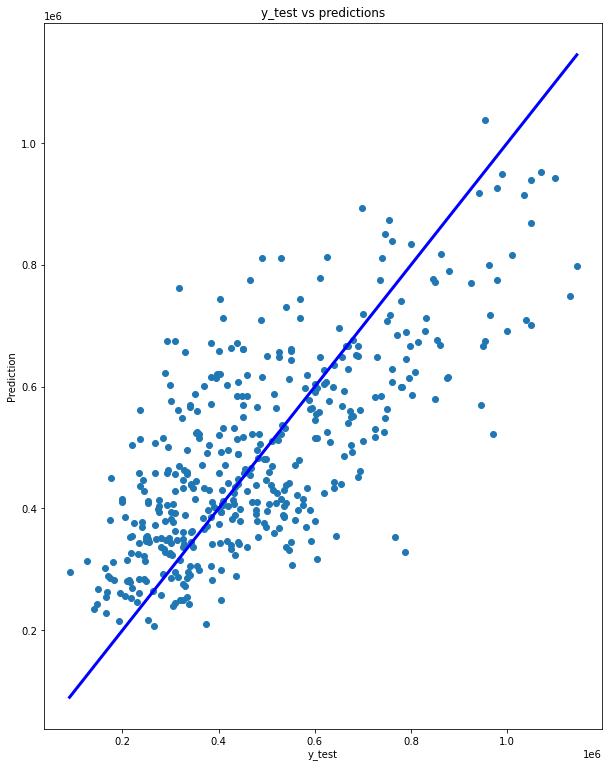

In [109]:
plt.figure(figsize=(10,13))
plt.scatter(y_test, y_randomforest)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='blue', linewidth=3)
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.title("y_test vs predictions")

**DECISION TREE REGRESSOR:**

In [92]:
from sklearn.tree import DecisionTreeRegressor  

In [93]:
regressor = DecisionTreeRegressor(random_state = 0)  

In [94]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [101]:
y_regressor= regressor.predict(X_test)
(regressor.score(X_test,y_test))

0.17855602789936886

Text(0.5, 1.0, 'y_test vs predictions')

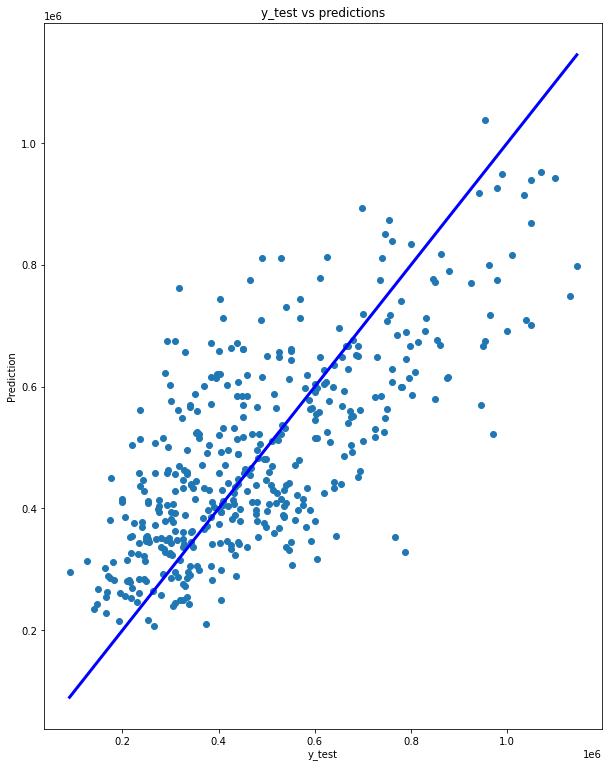

In [110]:
plt.figure(figsize=(10,13))
plt.scatter(y_test, y_randomforest)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='blue', linewidth=3)
plt.xlabel("y_test")
plt.ylabel("Prediction")
plt.title("y_test vs predictions")